In [1]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import glob
import cv2 
import os 
import re

In [2]:
img_dir = "testing_image/" # Enter Directory of all images  
data_path = os.path.join(img_dir,'*.png') 
files = glob.glob(data_path)
files.sort(key=lambda x:[int(c) if c.isdigit() else c for c in re.split(r'(\d+)',x)])
data = [] 
for f1 in files:
    img = Image.open(f1) 
    data.append(np.array(img))

img_array = np.array(data)    # all image in array form with dtype=uint8

shape of RGB image (1000, 1000, 4)


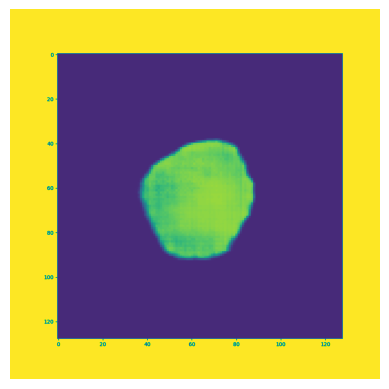

In [3]:
img = img_array[3]
im3 = img/img.max()
print('shape of RGB image', im3.shape)

def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

im = rgb2gray(img)
im = im/im.max()
plt.imshow(im)
plt.axis("off")
plt.show()

shape of grayscale image (480, 640, 4)


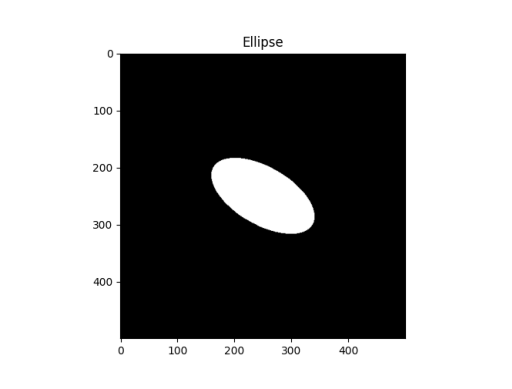

In [4]:
im = Image.open('fig1.png')
im = np.array(im)
print('shape of grayscale image', im.shape)
plt.imshow(im)
plt.axis('off')
plt.show()

im = im[:, :, 0]
height, width = im.shape

In [5]:
def moment(channel):
    
    height, width = channel.shape
    x = np.arange(0, width)
    y = np.arange(0, height)
    x, y = np.meshgrid(x, y)
    
    # the monopole
    M_00 = np.sum(channel)

    # the centroid
    cen_x = np.sum(x*channel)/M_00
    cen_y = np.sum(y*channel)/M_00

    # the dipole
    mu_10 = np.sum((x - cen_x) * channel) / M_00
    mu_01 = np.sum((y - cen_y) * channel) / M_00

    # the centered moment
    mu_11 = np.sum(x*y*channel)/M_00 - (cen_x*cen_y)
    mu_20 = np.sum(x**2 * channel)/M_00 - cen_x**2
    mu_02 = np.sum(y**2 * channel)/M_00 - cen_y**2

    # The orientation of the object
    alpha = 0.5 * np.arctan(2 * mu_11 / (mu_20 - mu_02))

    # semi-major and semi-minor axis
    delta = np.sqrt(4 * mu_11**2 + (mu_20 - mu_02)**2)
    lam1 = 0.5*(mu_20 + mu_02 + delta)
    lam2 = 0.5*(mu_20 + mu_02 - delta)
    a = np.sqrt(lam1)
    b = np.sqrt(lam2)

    # eccentricity
    e = np.sqrt(1 - lam2/lam1)

    # the area of ellipse
    A = 4*np.pi*np.sqrt(mu_20*mu_02 - mu_11**2)

    return M_00, cen_x, cen_y, mu_10, mu_01, alpha, a, b, e, A

In [6]:
# Calculate moments
M_00, centroid_x, centroid_y, dipole_x, dipole_y, alpha, a, b, e, A = moment(im)

# Print the results
print(f"Monopole (M_00): {M_00}")
print(f"Centroid (cen_x, cen_y): ({centroid_x}, {centroid_y})")
print(f"the dipole moment (dipole_x, dipole_y): ({dipole_x}, {dipole_y})")
print(f"Orientation (alpha): {alpha} radians")
print(f"Semi-major axis (a): {a}")
print(f"Semi-minor axis (b): {b}")
print(f"Eccentricity (e): {e}")
print(f"Area of ellipse (A): {A}")
# Convert it in degree
angle = np.rad2deg(alpha)
print("angle = {}°".format(angle))
print('the orientation of the ellipse :', alpha)

Monopole (M_00): 45278813
Centroid (cen_x, cen_y): (313.7712062372307, 237.1280993828173)
the dipole moment (dipole_x, dipole_y): (2.2543204517719234e-14, 5.0022877178004725e-14)
Orientation (alpha): -0.00041145273584392136 radians
Semi-major axis (a): 223.69579514423873
Semi-minor axis (b): 155.71159834320994
Eccentricity (e): 0.7179580340335902
Area of ellipse (A): 437712.19577456434
angle = -0.02357450523296782°
the orientation of the ellipse : -0.00041145273584392136


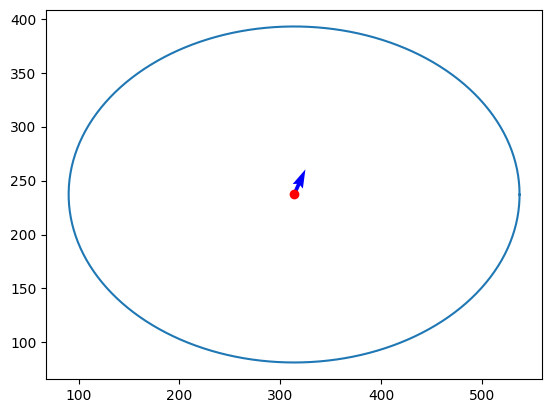

In [7]:
def ell(a, b):
    t = np.linspace(0, 2*np.pi, 501)
    
    X = a * np.cos(t)
    Y = b * np.sin(t)
    
    x = X * np.cos(alpha) - Y * np.sin(alpha) + centroid_x
    y = X * np.sin(alpha) + Y * np.cos(alpha) + centroid_y
    
    return x, y

# Generate ellipse points
x, y = ell(a, b)

# Plot ellipse
fig, ax = plt.subplots()
ax.plot(x, y, label='Ellipse')

# Plot centroid
ax.plot(centroid_x, centroid_y, 'ro', label='Centroid')

# Plot dipole
ax.quiver(centroid_x, centroid_y, dipole_x, dipole_y, color="b", label='Dipole')

plt.show()

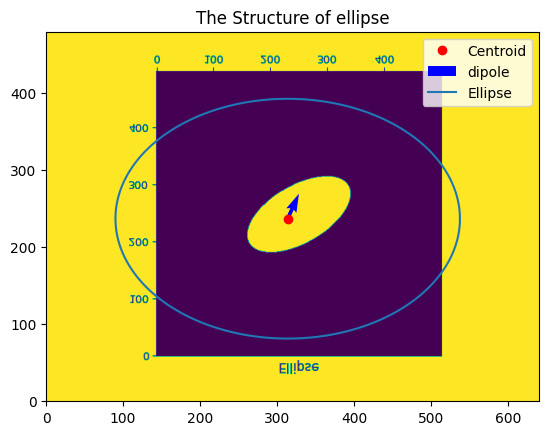

In [8]:
# Visualize the moments on the image
fig, ax = plt.subplots()
ax.imshow(im, origin='lower', extent=(0, width, 0, height))

# Plot centroid
ax.plot(centroid_x, centroid_y, 'ro', label='Centroid')

# the dipole
ax.quiver(centroid_x, centroid_y, dipole_x, dipole_y, color="b", label='dipole')

ax.plot(x, y, label='Ellipse')

plt.title('The Structure of ellipse')
plt.legend()
plt.show()